<a href="https://colab.research.google.com/github/rajputshivamsingh/ChatGPT-Reviews-Analysis/blob/main/chatpgt_pyn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Downloading...
From: https://drive.google.com/uc?id=1SJcoCmSKSv2lRfdyKpiypk1cUBaLBD6C
To: /content/chatgpt_reviews.csv
100%|██████████| 21.6M/21.6M [00:00<00:00, 82.4MB/s]


Dataset Loaded Successfully
                              Review Id  \
0  6fb93778-651a-4ad1-b5ed-67dd0bd35aac   
1  81caeefd-3a28-4601-a898-72897ac906f5   
2  452af49e-1d8b-4b68-b1ac-a94c64cb1dd5   
3  372a4096-ee6a-4b94-b046-cef0b646c965   
4  b0d66a4b-9bde-4b7c-8b11-66ed6ccdd7da   

                                              Review  Ratings  \
0                                               good        5   
1                                               good        5   
2                                           nice app        5   
3                                           nice, ig        5   
4  this is a great app, the bot is so accurate to...        5   

           Review Date  
0  2024-08-23 19:30:05  
1  2024-08-23 19:28:18  
2  2024-08-23 19:22:59  
3  2024-08-23 19:20:50  
4  2024-08-23 19:20:39  

 Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196727 entries, 0 to 196726
Data columns (total 4 columns):
 #   Column       Non-Null Count   Dtype 
--- 

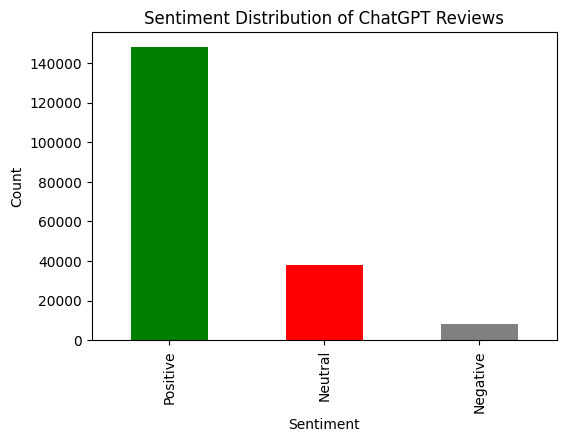

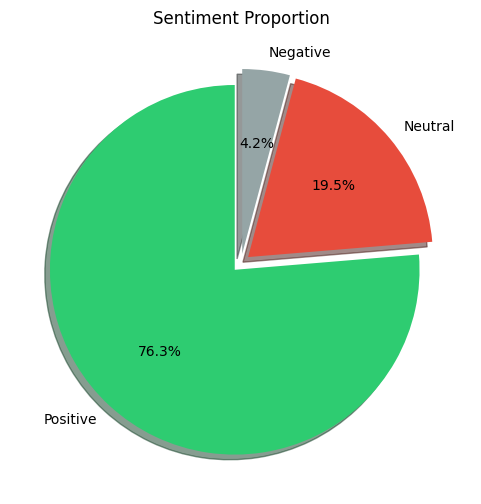

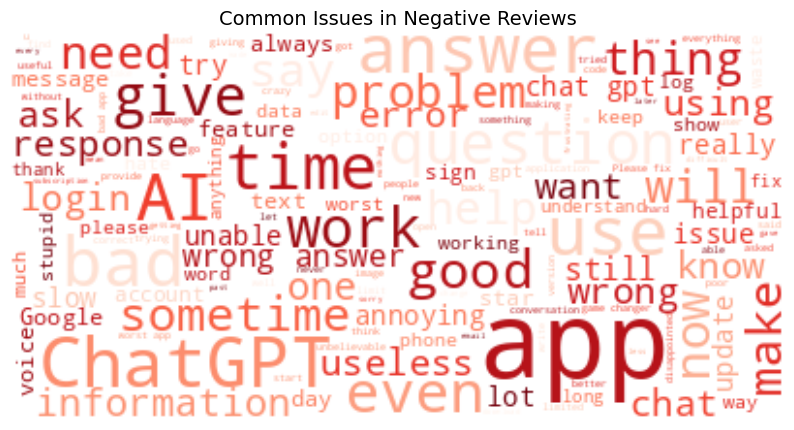

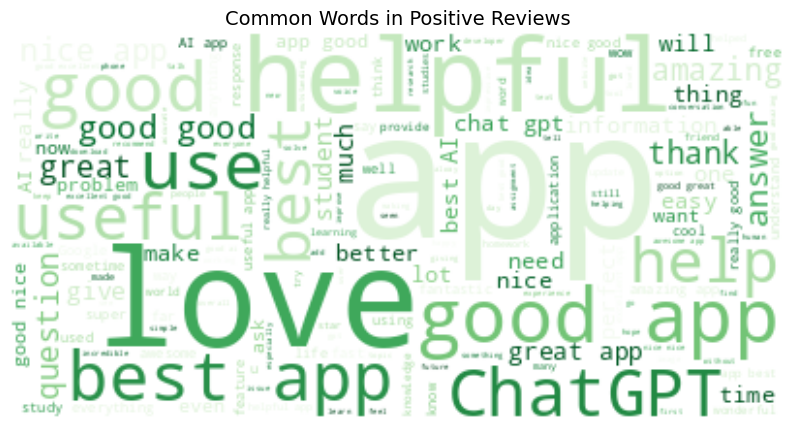

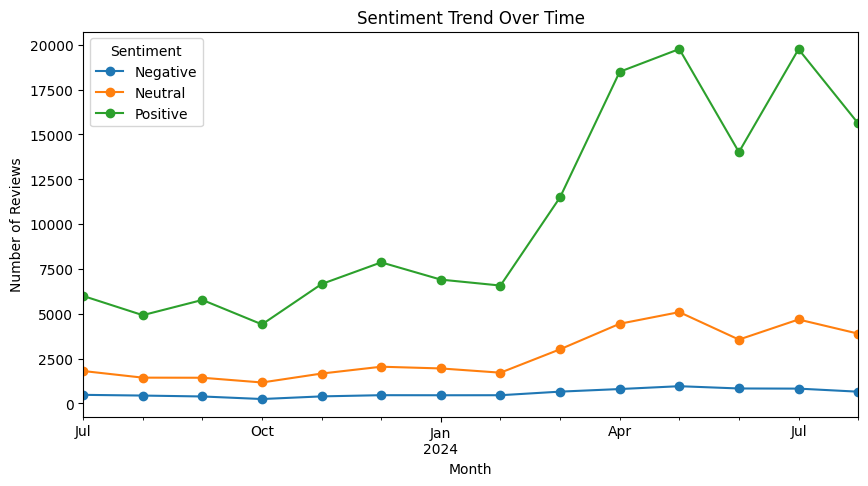

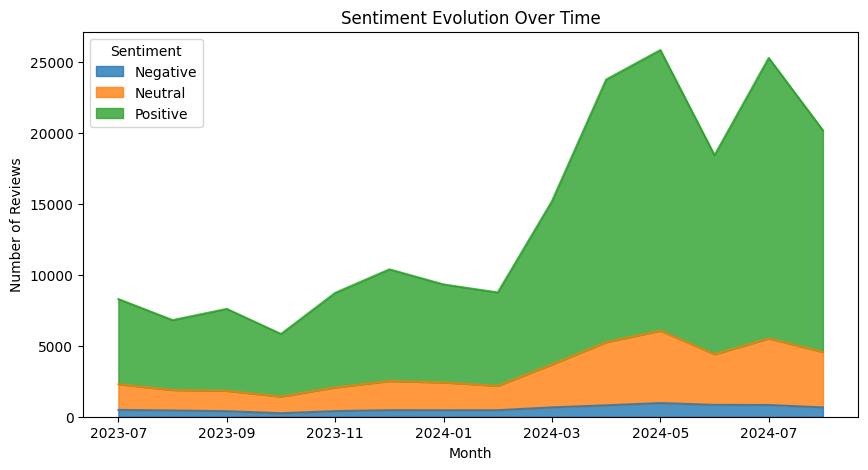

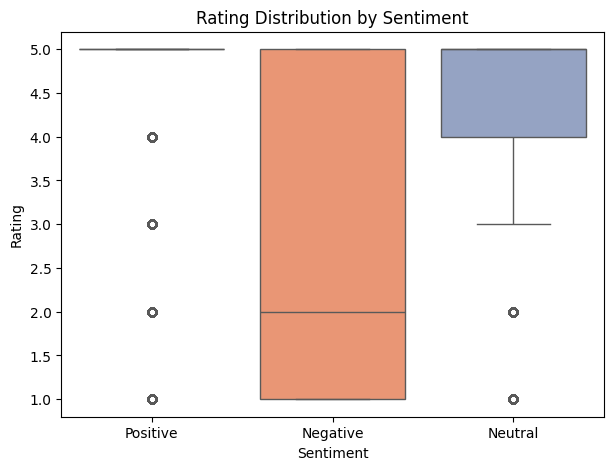

Project Completed Successfully!
Total Reviews Analyzed: 194210
Sentiment
Positive    148219
Neutral      37922
Negative      8069
Name: count, dtype: int64


In [ ]:
# Step 1: Install Required Libraries
# ===============================
!pip install -q gdown textblob nltk wordcloud emoji

# ===============================
# Step 2: Import Libraries
# ===============================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from textblob import TextBlob
from wordcloud import WordCloud, STOPWORDS
import nltk
import warnings
warnings.filterwarnings('ignore')

# Download essential NLP data
nltk.download('punkt', quiet=True)
nltk.download('stopwords', quiet=True)

# ===============================
# Step 3: Load Dataset from Google Drive
# ===============================
import gdown

url = 'https://drive.google.com/uc?id=1SJcoCmSKSv2lRfdyKpiypk1cUBaLBD6C'
output = 'chatgpt_reviews.csv'
gdown.download(url, output, quiet=False)

df = pd.read_csv('chatgpt_reviews.csv')
print("Dataset Loaded Successfully")
print(df.head())

# ===============================
# Step 4: Explore Dataset Structure
# ===============================
print("\n Dataset Info:")
print(df.info())

print("\n Missing Values:\n", df.isnull().sum())
print("\n Columns in Dataset:", df.columns.tolist())

# ===============================
# Step 5: Clean Data
# ===============================
# Remove duplicates and empty reviews
df.drop_duplicates(inplace=True)
df.dropna(subset=['Review'], inplace=True)

# Convert date column to datetime
df['Review Date'] = pd.to_datetime(df['Review Date'], errors='coerce')

print("\n After Cleaning:", df.shape)

# ===============================
# Step 6: Perform Sentiment Analysis
# ===============================
# Calculate polarity using TextBlob
df['Polarity'] = df['Review'].apply(lambda x: TextBlob(x).sentiment.polarity)

# Convert polarity scores to sentiment labels
def get_sentiment(score):
    if score > 0:
        return 'Positive'
    elif score < 0:
        return 'Negative'
    else:
        return 'Neutral'

df['Sentiment'] = df['Polarity'].apply(get_sentiment)

print("\n Sentiment Analysis Completed!")
print(df[['Review', 'Polarity', 'Sentiment']].head())

# ===============================
# Step 7: Sentiment Distribution Visualization
# ===============================
plt.figure(figsize=(6,4))
df['Sentiment'].value_counts().plot(kind='bar', color=['green','red','gray'])
plt.title('Sentiment Distribution of ChatGPT Reviews')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

# Visual 1: Sentiment Proportion Pie Chart
plt.figure(figsize=(6,6))
colors = ['#2ecc71', '#e74c3c', '#95a5a6']  # green, red, gray
df['Sentiment'].value_counts().plot.pie(
    autopct='%1.1f%%',
    startangle=90,
    colors=colors,
    explode=[0.05,0.05,0.05],
    shadow=True
)
plt.title('Sentiment Proportion')
plt.ylabel('')
plt.show()

# ===============================
# Step 8: Identify Common Issues (Negative Reviews)
# ===============================
negative_reviews = df[df['Sentiment'] == 'Negative']['Review']

# WordCloud for Negative Reviews
wordcloud_neg = WordCloud(stopwords=STOPWORDS, background_color='white', colormap='Reds').generate(' '.join(negative_reviews))
plt.figure(figsize=(10,6))
plt.imshow(wordcloud_neg, interpolation='bilinear')
plt.axis('off')
plt.title('Common Issues in Negative Reviews', fontsize=14)
plt.show()

# Visual 2: WordCloud for Positive Reviews
positive_reviews = df[df['Sentiment'] == 'Positive']['Review']
wordcloud_pos = WordCloud(stopwords=STOPWORDS, background_color='white', colormap='Greens').generate(' '.join(positive_reviews))
plt.figure(figsize=(10,6))
plt.imshow(wordcloud_pos, interpolation='bilinear')
plt.axis('off')
plt.title('Common Words in Positive Reviews', fontsize=14)
plt.show()

# ===============================
# Step 9: Analyze Sentiment Trend Over Time
# ===============================
df['Review Date'] = pd.to_datetime(df['Review Date'])
df['Month'] = df['Review Date'].dt.to_period('M')

monthly_sentiment = df.groupby(['Month', 'Sentiment']).size().unstack(fill_value=0)

# Line Chart for Sentiment Trend
monthly_sentiment.plot(kind='line', marker='o', figsize=(10,5))
plt.title('Sentiment Trend Over Time')
plt.xlabel('Month')
plt.ylabel('Number of Reviews')
plt.legend(title='Sentiment')
plt.show()

# Additional Visual 3: Stacked Area Chart for Monthly Sentiment
monthly_sentiment.index = monthly_sentiment.index.astype(str)
monthly_sentiment.plot(kind='area', figsize=(10,5), alpha=0.8)
plt.title('Sentiment Evolution Over Time')
plt.xlabel('Month')
plt.ylabel('Number of Reviews')
plt.legend(title='Sentiment')
plt.show()

# ===============================
# Step 10: Rating vs Sentiment Visualization
# ===============================
plt.figure(figsize=(7,5))
sns.boxplot(x='Sentiment', y='Ratings', data=df, palette='Set2')
plt.title('Rating Distribution by Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Rating')
plt.show()

# ===============================
# Step 11: Final Summary
# ===============================
print("Project Completed Successfully!")
print("Total Reviews Analyzed:", len(df))
print(df['Sentiment'].value_counts())